<a href="https://colab.research.google.com/github/Rebecca38/Machine_Learning_Projects/blob/master/Breast_cancer_dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import matplotlib.colors as mcolors
from sklearn.datasets import load_breast_cancer


#### Load the dataset


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

#### Checking if data was loaded sucessfully

In [ ]:
df = pd.concat([X, y], axis=1)
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (569, 31)


#### Create 3 plots

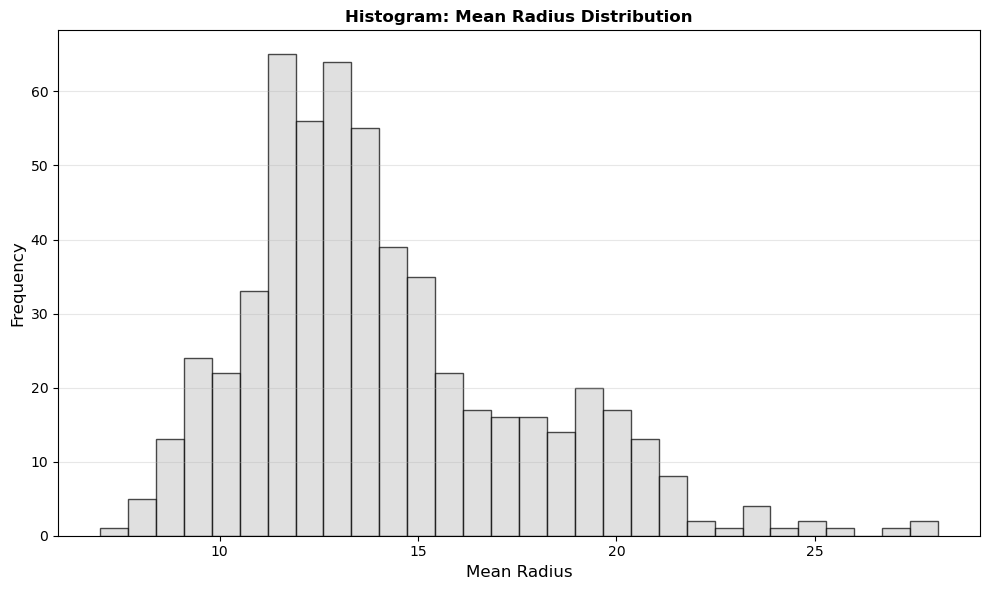

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['mean radius'], bins=30, alpha=0.7, color='lightgray', edgecolor='black')
plt.title('Histogram: Mean Radius Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Mean Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### • The mean radius histogram shows a right-skewed distribution with most tumors having smaller radii

#### Scatter Plot

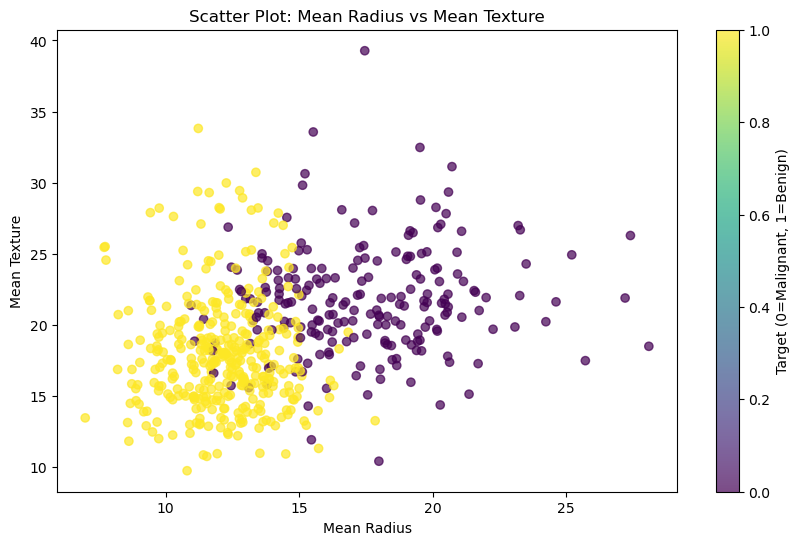

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['mean radius'], df['mean texture'],
c=df['target'], alpha=0.7, cmap='viridis')
plt.title('Scatter Plot: Mean Radius vs Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.colorbar(scatter, label='Target (0=Malignant, 1=Benign)')
plt.show()

#### • The scatter plot reveals some separation between malignant and benign cases based on radius and texture

####  Box plot

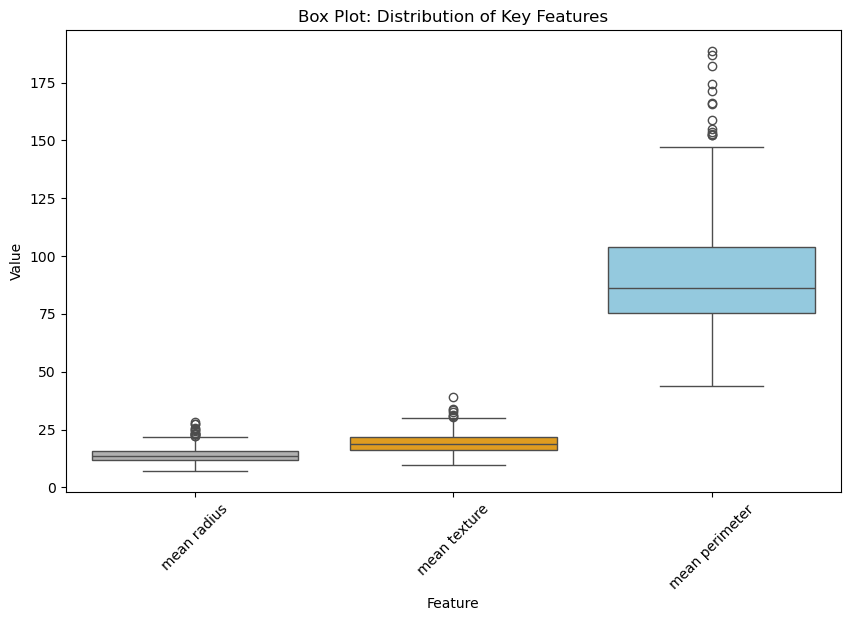

In [ ]:
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df[['mean radius', 'mean texture', 'mean perimeter']],
var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value',
hue='feature', palette=['#B0B0B0', 'orange', 'skyblue'], legend=False)
plt.title('Box Plot: Distribution of Key Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

• Box plots indicate different scales across features, suggesting need for standardization

# Dataset Exploration

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Data types:\n{df.dtypes.value_counts()}")
print(f"Target variable: 'target' with values 0 (malignant) and 1 (benign)")
print(f"Target distribution:\n{df['target'].value_counts()}")

Number of rows: 569
Number of columns: 31
Data types:
float64    30
int32       1
Name: count, dtype: int64
Target variable: 'target' with values 0 (malignant) and 1 (benign)
Target distribution:
target
1    357
0    212
Name: count, dtype: int64


#### Dataset Description
The dataset contains 569 observations (rows) representing individual patient cases
This is the Breast Cancer Wisconsin dataset, a classic binary classification dataset.
It contains 569 samples of breast cancer biopsies with 31 numerical features describing cell nucleus characteristics.
The goal is to predict whether a tumor is malignant or benign.The target variable is a binary classification outcome where 0 represents malignant (cancerous) cases and 1 represents benign (non-cancerous) cases.

# One-Hot Encoding & Transformation

In [ ]:
# Categorical feature by binning mean radius
df_copy = df.copy()
radius_bins = pd.cut(df_copy['mean radius'], bins=3, labels=['small', 'medium', 'large'])
df_copy['radius_category'] = radius_bins

print("BEFORE One-Hot Encoding:")
print(df_copy[['mean radius', 'radius_category']].head(10))
print("\n" + "="*80)

# One-hot encoding for categorical feature
radius_encoded = pd.get_dummies(df_copy['radius_category'], prefix='radius', dtype=int)

print("\nONE-HOT ENCODED COLUMNS:")
print(radius_encoded.head(10))
print("\n" + "="*80)

# Combine with dataframe
df_encoded = pd.concat([df_copy, radius_encoded], axis=1)

print("\nFINAL DATAFRAME (showing relevant columns):")
print(df_encoded[['mean radius', 'radius_category', 'radius_small', 'radius_medium', 'radius_large']].head(10))


BEFORE One-Hot Encoding:
   mean radius radius_category
0        17.99          medium
1        20.57          medium
2        19.69          medium
3        11.42           small
4        20.29          medium
5        12.45           small
6        18.25          medium
7        13.71           small
8        13.00           small
9        12.46           small


ONE-HOT ENCODED COLUMNS:
   radius_small  radius_medium  radius_large
0             0              1             0
1             0              1             0
2             0              1             0
3             1              0             0
4             0              1             0
5             1              0             0
6             0              1             0
7             1              0             0
8             1              0             0
9             1              0             0


FINAL DATAFRAME (showing relevant columns):
   mean radius radius_category  radius_small  radius_medium  radiu

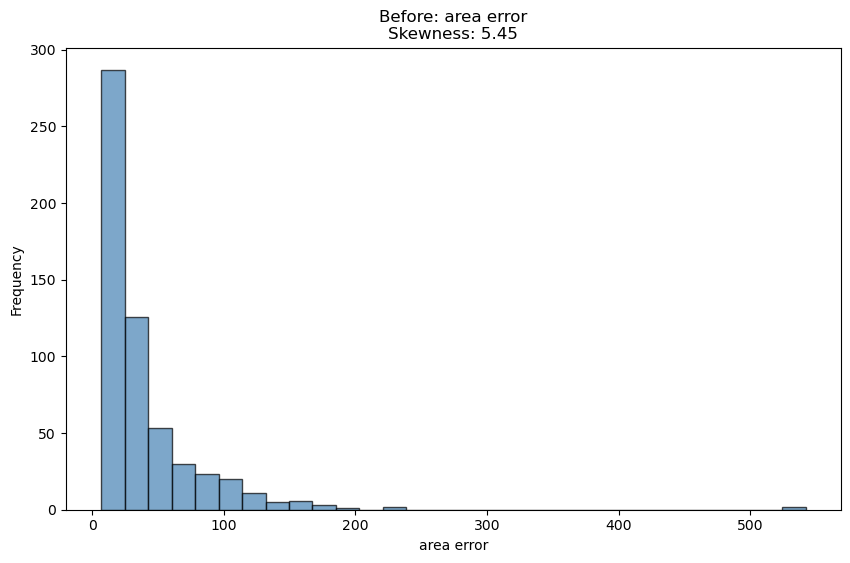

In [ ]:
skewness = X.skew()

# Find most skewed
most_skewed = skewness.abs().idxmax()

# Before transformation
plt.figure(figsize=(10, 6))
plt.hist(X[most_skewed], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title(f'Before: {most_skewed}\nSkewness: {skewness[most_skewed]:.2f}')
plt.xlabel(most_skewed)
plt.ylabel('Frequency')
plt.show()

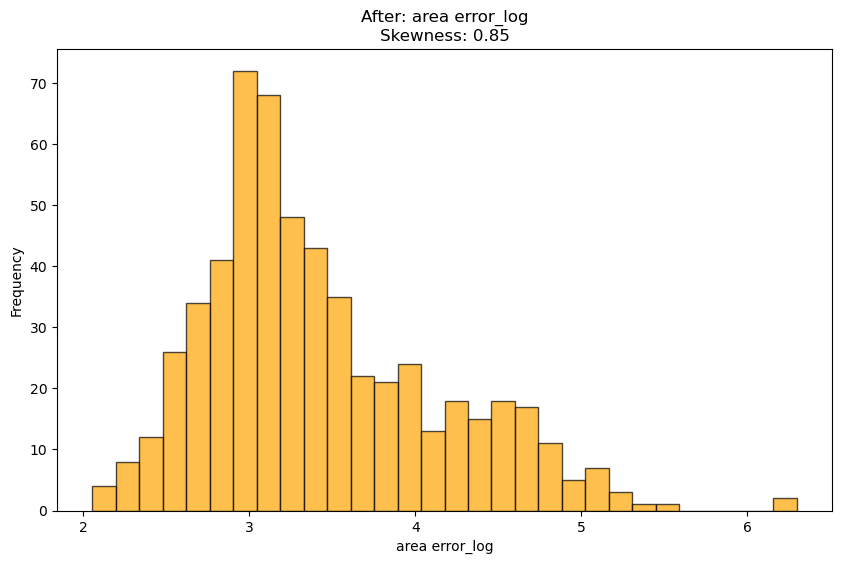

Skewness change: 5.447 → 0.847
Improvement: 4.600


In [ ]:
# Apply transformation
log_feature = most_skewed + '_log'
df_transformed = df.copy()
df_transformed[log_feature] = np.log1p(df[most_skewed])
new_skew = df_transformed[log_feature].skew()

# After transformation
plt.figure(figsize=(10, 6))
plt.hist(df_transformed[log_feature], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title(f'After: {log_feature}\nSkewness: {new_skew:.2f}')
plt.xlabel(log_feature)
plt.ylabel('Frequency')
plt.show()

# change
print(f"Skewness change: {skewness[most_skewed]:.3f} → {new_skew:.3f}")
print(f"Improvement: {abs(skewness[most_skewed]) - abs(new_skew):.3f}")

# Baseline Model on Raw Data

In [ ]:
RANDOM_STATE = 42

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train SVM on raw data (no scaling)
svm_baseline = SVC(random_state=RANDOM_STATE)
svm_baseline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = svm_baseline.predict(X_test)

# Evaluate metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

print("\nBaseline Model Performance (Raw Data):")
print(f"Accuracy:  {accuracy_baseline:.4f}")
print(f"Precision: {precision_baseline:.4f}")
print(f"Recall:    {recall_baseline:.4f}")
print(f"F1-Score:  {f1_baseline:.4f}")

Training set shape: (455, 30)
Test set shape: (114, 30)

Baseline Model Performance (Raw Data):
Accuracy:  0.9298
Precision: 0.9211
Recall:    0.9722
F1-Score:  0.9459


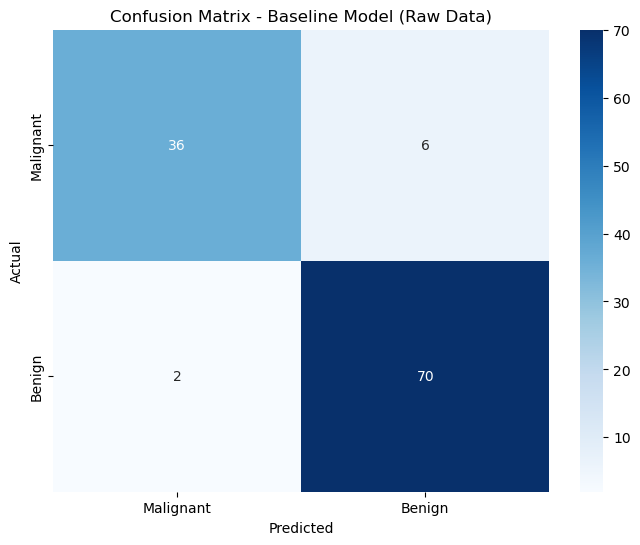

In [ ]:
# Confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
xticklabels=['Malignant', 'Benign'],
yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Baseline Model (Raw Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Handling missing Data

In [ ]:
# Simulate missing values (~2%)
df_missing = df.copy()
np.random.seed(RANDOM_STATE)
n_missing = int(0.02 * df_missing.shape[0] * df_missing.shape[1])
missing_indices = np.random.choice(df_missing.size, n_missing, replace=False)


In [ ]:
# Creating missing values
df_flat = df_missing.values.flatten()
df_flat[missing_indices] = np.nan
df_missing = pd.DataFrame(df_flat.reshape(df_missing.shape),
columns=df_missing.columns, index=df_missing.index)
print(f"Simulated missing values: {df_missing.isnull().sum().sum()} ({df_missing.isnull().sum().sum()/(df_missing.size)*100:.2f}%)")

Simulated missing values: 352 (2.00%)


In [ ]:
# Median imputation Method A
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df_missing.columns)

# Drop rows Method B
df_dropped = df_missing.dropna()

# Results
print("Method A - Median Imputation:")
print(f"Shape: {df_imputed.shape}")
print(f"Missing values: {df_imputed.isnull().sum().sum()}")

print("\nMethod B - Drop Rows:")
print(f"Shape: {df_dropped.shape}")
print(f"Missing values: {df_dropped.isnull().sum().sum()}")
print(f"Rows lost: {df_missing.shape[0] - df_dropped.shape[0]}")
print("\nPros and Cons:")
print("Method A (Imputation): Preserves all samples but may introduce bias")
print("Method B (Dropping): Maintains data integrity but loses valuable samples")

Method A - Median Imputation:
Shape: (569, 31)
Missing values: 0

Method B - Drop Rows:
Shape: (300, 31)
Missing values: 0
Rows lost: 269

Pros and Cons:
Method A (Imputation): Preserves all samples but may introduce bias
Method B (Dropping): Maintains data integrity but loses valuable samples


# Outlier Detection with IsolationForest

In [ ]:
# IsolationForest with contamination 0.03
isolation_forest = IsolationForest(contamination=0.03, random_state=RANDOM_STATE)
outlier_labels = isolation_forest.fit_predict(X)


In [ ]:
# Removing outliers
outlier_mask = outlier_labels == 1  # 1 = normal, -1 = outlier
X_clean = X[outlier_mask]
y_clean = y[outlier_mask]

In [ ]:
outliers_removed = np.sum(outlier_labels == -1)
print(f"Outliers detected and removed: {outliers_removed}")
print(f"Original shape: {X.shape}")
print(f"After outlier removal: {X_clean.shape}")

Outliers detected and removed: 18
Original shape: (569, 30)
After outlier removal: (551, 30)


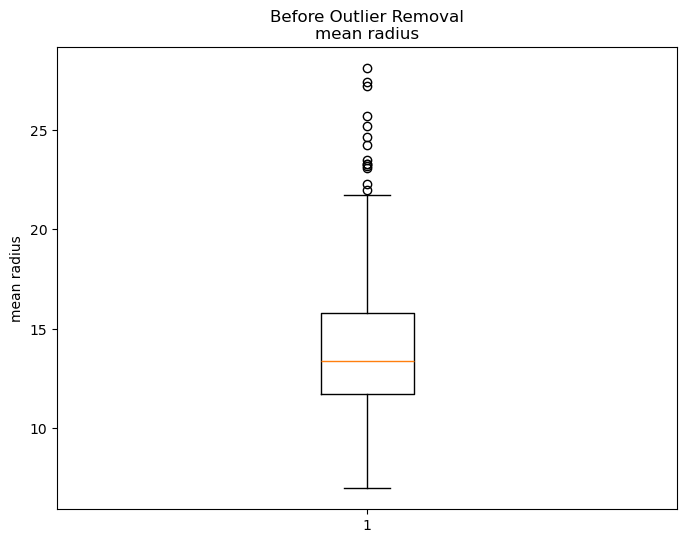

In [ ]:
# Before outlier removal
feature_for_plot = 'mean radius'
plt.figure(figsize=(8, 6))
plt.boxplot(X[feature_for_plot])
plt.title(f'Before Outlier Removal\n{feature_for_plot}')
plt.ylabel(feature_for_plot)
plt.show()

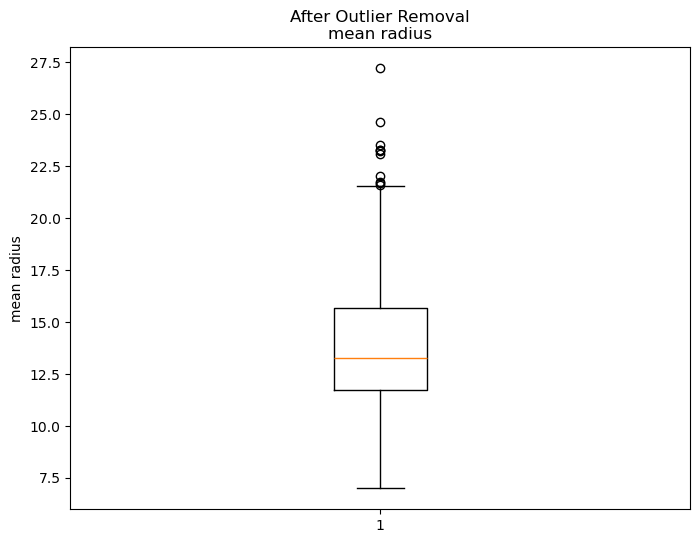

In [ ]:
# After outlier removal
plt.figure(figsize=(8, 6))
plt.boxplot(X_clean[feature_for_plot])
plt.title(f'After Outlier Removal\n{feature_for_plot}')
plt.ylabel(feature_for_plot)
plt.show()

In [ ]:
# Report change
print(f"Before: [{X[feature_for_plot].min():.2f}, {X[feature_for_plot].max():.2f}]")
print(f"After: [{X_clean[feature_for_plot].min():.2f}, {X_clean[feature_for_plot].max():.2f}]")

Before: [6.98, 28.11]
After: [6.98, 27.22]


# Feature Scaling

In [ ]:
# Standardization (Z-score)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean),
                       columns=X_clean.columns, index=X_clean.index)

# Means and Standardization for sanity check
print("Sanity check after standardization:")
print(f"Means (should be ~0): {X_scaled.mean().abs().max():.6f}")
print(f"Stds (should be ~1): {X_scaled.std().min():.6f} to {X_scaled.std().max():.6f}")

print("\nFirst 5 features - means and stds:")
for col in X_scaled.columns[:5]:
    print(f"{col}: mean={X_scaled[col].mean():.6f}, std={X_scaled[col].std():.6f}")


Sanity check after standardization:
Means (should be ~0): 0.000000
Stds (should be ~1): 1.000909 to 1.000909

First 5 features - means and stds:
mean radius: mean=-0.000000, std=1.000909
mean texture: mean=-0.000000, std=1.000909
mean perimeter: mean=-0.000000, std=1.000909
mean area: mean=-0.000000, std=1.000909
mean smoothness: mean=0.000000, std=1.000909


# Train, Validation, and Test Split

In [ ]:
# Create validation split (80/20 from training)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=RANDOM_STATE, stratify=y_clean
)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_clean, y_train_clean, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train_clean
)
print(f"Final split shapes:")
print(f"Training:   {X_train_final.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test:       {X_test_clean.shape}")


Final split shapes:
Training:   (352, 30)
Validation: (88, 30)
Test:       (111, 30)


In [ ]:
# Compare different split ratios
print(f"\nSplit ratio comparison:")
print(f"80/20 split - Train: {X_train_clean.shape[0]}, Test: {X_test_clean.shape[0]}")

# Simulate 70/30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X_scaled, y_clean, test_size=0.3, random_state=RANDOM_STATE, stratify=y_clean
)
print(f"70/30 split - Train: {X_train_70.shape[0]}, Test: {X_test_30.shape[0]}")

print("\nDiscussion:")
print("• 80/20 split provides more training data, potentially better model performance")
print("• 70/30 split provides larger test set, more reliable performance estimation")
print("• With limited data (569 samples), 80/20 is preferable to maximize training data")



Split ratio comparison:
80/20 split - Train: 440, Test: 111
70/30 split - Train: 385, Test: 166

Discussion:
• 80/20 split provides more training data, potentially better model performance
• 70/30 split provides larger test set, more reliable performance estimation
• With limited data (569 samples), 80/20 is preferable to maximize training data


# Retrain Same Model After Preprocessing

In [ ]:
# Train SVM on cleaned and scaled data
svm_improved = SVC(random_state=RANDOM_STATE)
svm_improved.fit(X_train_final, y_train_final)

# Evaluate on validation set
y_pred_val = svm_improved.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Evaluate on test set
y_pred_test_improved = svm_improved.predict(X_test_clean)
accuracy_test = accuracy_score(y_test_clean, y_pred_test_improved)
precision_test = precision_score(y_test_clean, y_pred_test_improved)
recall_test = recall_score(y_test_clean, y_pred_test_improved)
f1_test = f1_score(y_test_clean, y_pred_test_improved)


In [ ]:

print("Improved Model Performance:")
print("\nValidation Set:")
print(f"Accuracy:  {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall:    {recall_val:.4f}")
print(f"F1-Score:  {f1_val:.4f}")

print("\nTest Set:")
print(f"Accuracy:  {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1-Score:  {f1_test:.4f}")

print("\nComparison with Q4 Baseline:")
print(f"Accuracy improvement:  {accuracy_test - accuracy_baseline:+.4f}")
print(f"Precision improvement: {precision_test - precision_baseline:+.4f}")
print(f"Recall improvement:    {recall_test - recall_baseline:+.4f}")
print(f"F1-Score improvement:  {f1_test - f1_baseline:+.4f}")

Improved Model Performance:

Validation Set:
Accuracy:  0.9659
Precision: 0.9500
Recall:    1.0000
F1-Score:  0.9744

Test Set:
Accuracy:  0.9640
Precision: 0.9467
Recall:    1.0000
F1-Score:  0.9726

Comparison with Q4 Baseline:
Accuracy improvement:  +0.0341
Precision improvement: +0.0256
Recall improvement:    +0.0278
F1-Score improvement:  +0.0267


# Visualization Portfolio

In [ ]:
# Histogram

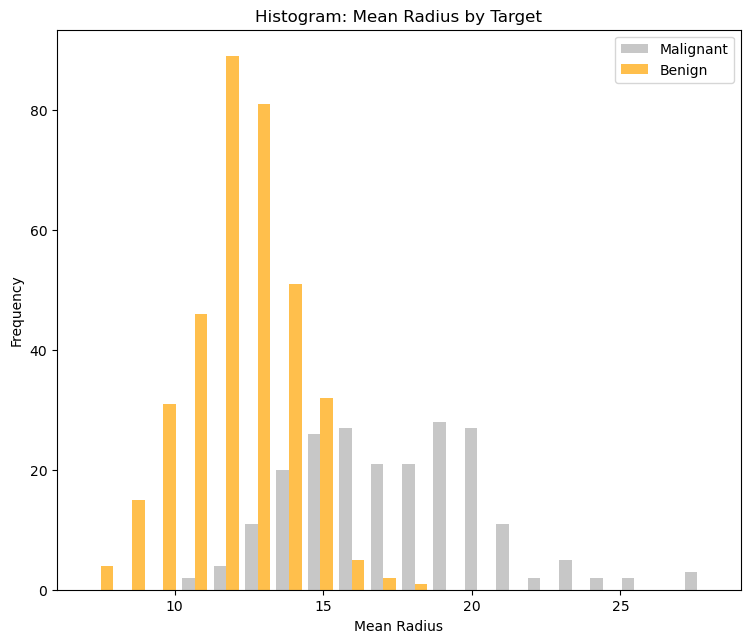

In [ ]:
fig = plt.figure(figsize=(30, 16))
plt.subplot(2, 3, 1)
plt.hist([df[df['target']==0]['mean radius'], df[df['target']==1]['mean radius']],
bins=20, alpha=0.7, label=['Malignant', 'Benign'], color=['#B0B0B0', 'orange'])
plt.title('Histogram: Mean Radius by Target')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()

Histogram insights:
 * Malignant tumors tend to have larger mean radius values
 * Benign cases outnumber malignant.
 * Benign: smaller, clustered around mean radius 8-18
 * Malignant: larger, spread across mean radius 11-27

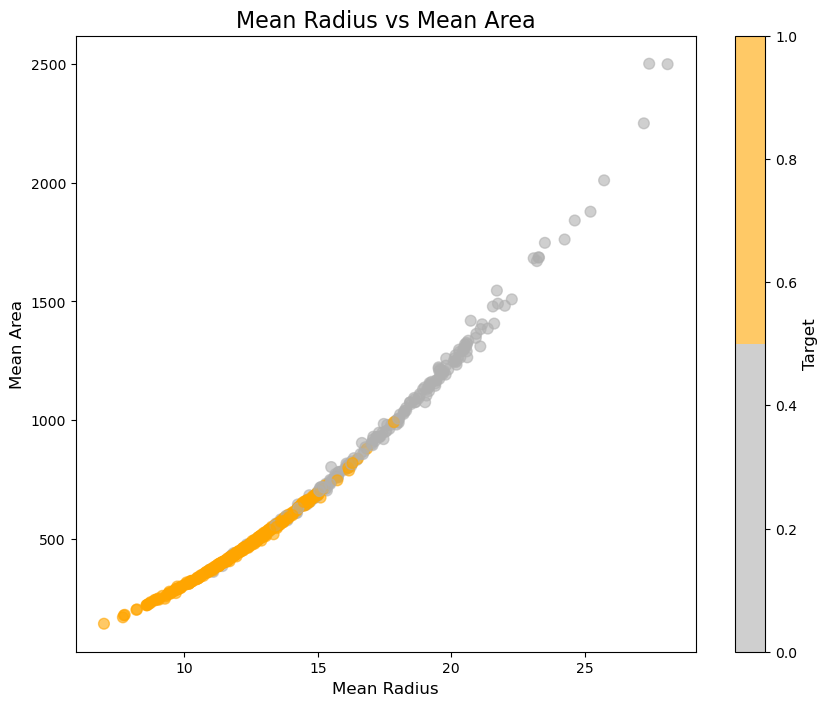

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 8))
colors = ['#B0B0B0', 'orange']
cmap = mcolors.ListedColormap(colors)
scatter = plt.scatter(df['mean radius'], df['mean area'],
c=df['target'], alpha=0.6, cmap=cmap, s=60)
plt.title('Mean Radius vs Mean Area', fontsize=16)
plt.xlabel('Mean Radius', fontsize=12)
plt.ylabel('Mean Area', fontsize=12)
cbar = plt.colorbar(scatter, label='Target')
cbar.set_label('Target', fontsize=12)
plt.show()

Scatter plot insights:
* here is a strong positive correlation between radius and area, clear class separation

#### Heatmap (correlation matrix)


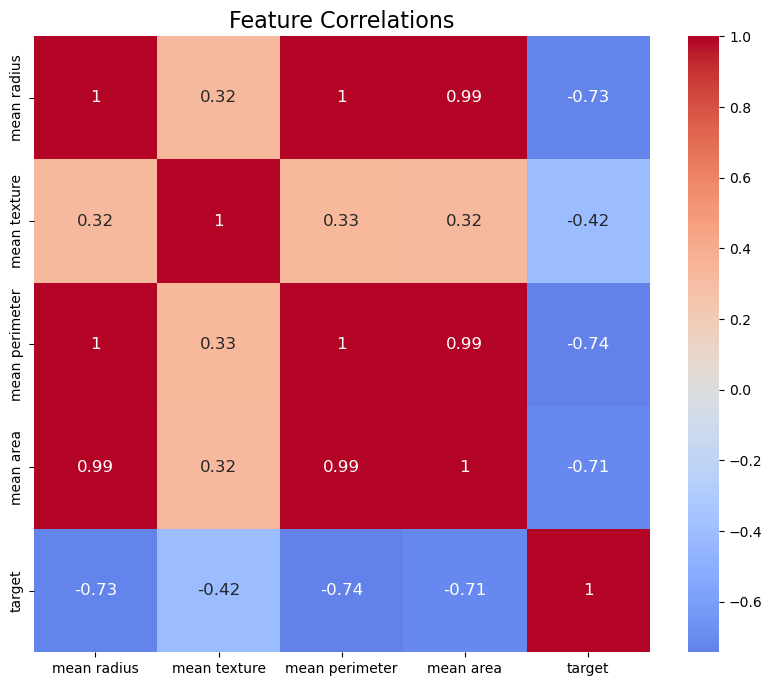

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
corr_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True,
annot_kws={'size': 12})
plt.title('Feature Correlations', fontsize=16)
plt.show()

Heatmap insights:
* High correlations between geometric features radius, area, perimeter
* All geometric measurements show strong negative correlation with target (-0.71 to -0.74), confirming that larger tumors are consistently associated with malignant diagnosis, while mean texture shows weaker predictive power (-0.42)

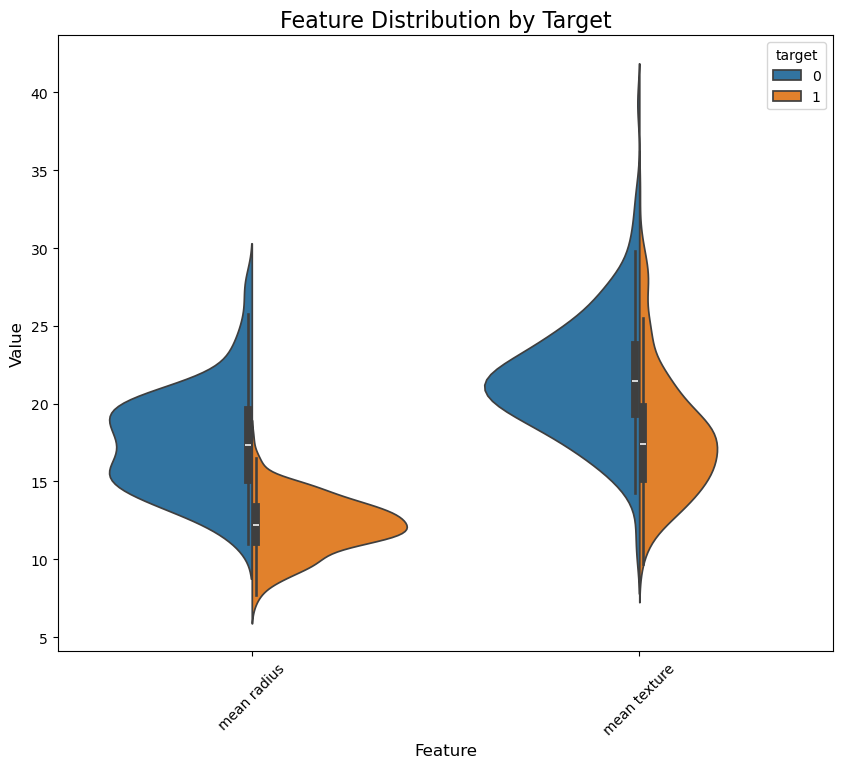

In [ ]:
# Violin Plot
plt.figure(figsize=(10, 8))
df_violin = df.melt(id_vars=['target'],
value_vars=['mean radius', 'mean texture'],
var_name='feature', value_name='value')
sns.violinplot(data=df_violin, x='feature', y='value', hue='target', split=True)
plt.title('Feature Distribution by Target', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Violin plot Insights:
* Benign tumors show more concentrated distributions

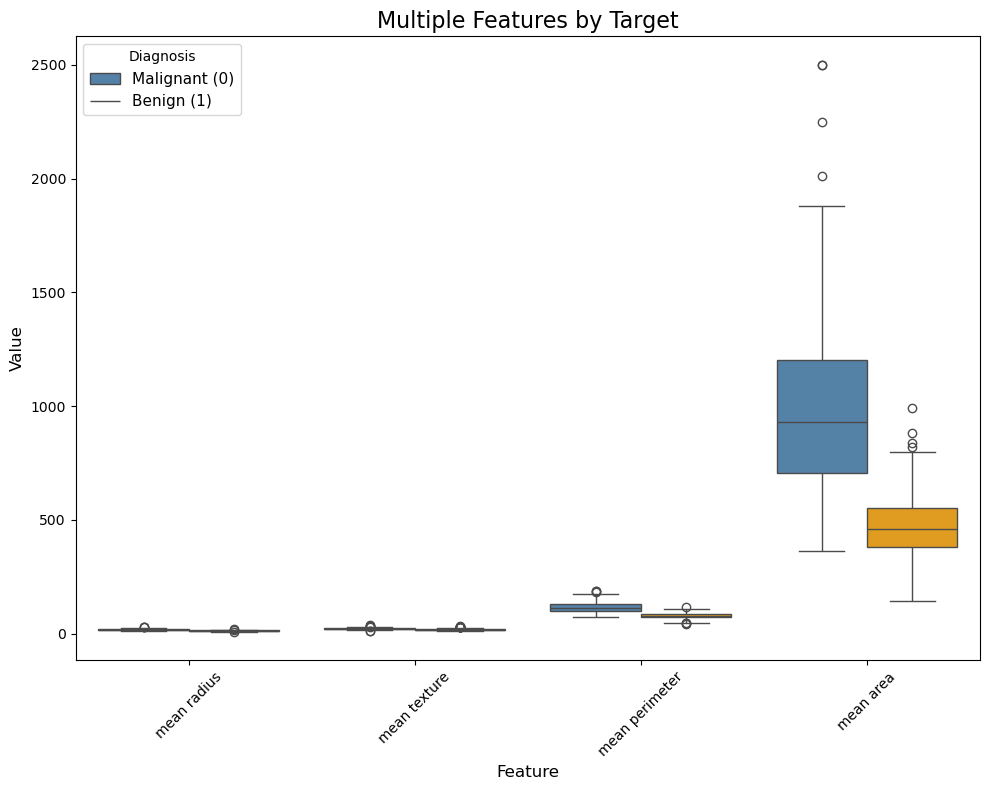

In [ ]:
# Box Plots
plt.figure(figsize=(10, 8))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_box = df[features_to_plot + ['target']]
df_box_melted = df_box.melt(id_vars=['target'], var_name='feature', value_name='value')
# Use explicit colors for clarity
sns.boxplot(data=df_box_melted, x='feature', y='value', hue='target',
palette={0: 'steelblue', 1: 'orange'})
plt.title('Multiple Features by Target', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Diagnosis', labels=['Malignant (0)', 'Benign (1)'], fontsize=11)
plt.tight_layout()
plt.show()

Box Plot Insights:
* Malignant tumors show higher values and more outliers
* Mean area shows the most extreme outliers and widest distribution for malignant cases, while benign tumors (orange) remain tightly clustered at lower values.